### Fingerhut Data Modeling and Analysis

**Modeling Ideas**
- predictive modeling
    - use frequencies as numeric data
    - can feature engineer more predictors
    - predict a successful from a non-successful journey
- clustering
    - find out some way to cluster these journeys
    - k means? KNN? dimension reduction
    - group customers based on journey patterns
- markov modeling
    - does not preserve order
    - how to preserve order? weigh steps differently?
    - steady state probabilities?
- sequential pattern mining
    - sma
    - reveal common paths customers take
    - aid in personalized recs/marketing strats
- network analysis
    - graph theory to model journeys instead of chains?
    - find bottlenecks and patterns of behaviors

In [2]:
# import necessary packages 
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
# read dataset
fh_data = pd.read_csv("transformed_data.csv")

In [4]:
fh_data.head()

,Unnamed: 0,customer_id,account_id,event_list,frequency_vector,recieved_promo,journey_successful
0,0,-784961211,1773350293,"['application_web_approved', 'application_web_...","[0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, ...",False,False
1,0,15849251,383997507,"['browse_products', 'browse_products', 'browse...","[0, 0, 66, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 6, 0,...",True,False
2,0,155529381,1786111954,"['campaign_click', 'application_web_approved',...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",False,False
3,0,-1697747935,-1016455199,"['application_web_view', 'application_web_view...","[0, 0, 0, 0, 0, 0, 0, 11, 0, 1, 0, 0, 0, 0, 0,...",True,False
4,0,-986357645,1289564882,"['application_web_approved', 'browse_products'...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",False,False


In [5]:
fh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735766 entries, 0 to 1735765
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   customer_id         int64 
 2   account_id          int64 
 3   event_list          object
 4   frequency_vector    object
 5   recieved_promo      bool  
 6   journey_successful  bool  
dtypes: bool(2), int64(3), object(2)
memory usage: 69.5+ MB


### Predictive Modeling

In [6]:
# import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
# split 'frequency_vector' into a seperate columns
event_columns = fh_data['frequency_vector'].str.split(',', expand = True)

# rename the new columns
event_columns.columns = [f"event_{i}" for i in range(1, event_columns.shape[1] + 1)]

# remove brackets from end columns
event_columns['event_1'] = event_columns['event_1'].str.replace('[', '')
event_columns['event_28'] = event_columns['event_28'].str.replace(']', '')

/var/folders/z4/1nckxbbs45q8z44xg1hvdp8c0000gn/T/ipykernel_688/661284522.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  event_columns['event_1'] = event_columns['event_1'].str.replace('[', '')
/var/folders/z4/1nckxbbs45q8z44xg1hvdp8c0000gn/T/ipykernel_688/661284522.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  event_columns['event_28'] = event_columns['event_28'].str.replace(']', '')


In [8]:
event_columns

,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,...,event_19,event_20,event_21,event_22,event_23,event_24,event_25,event_26,event_27,event_28
0,0,0,0,0,0,0,0,3,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,66,0,0,0,0,5,0,1,...,0,0,0,1,2,5,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,11,0,1,...,0,0,0,0,0,4,0,0,0,1
4,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735761,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1735762,0,0,0,0,0,0,0,4,0,1,...,0,0,0,0,0,4,0,0,0,1
1735763,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,2,0,0,0,1
1735764,0,0,2,0,0,0,0,10,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
event_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735766 entries, 0 to 1735765
Data columns (total 28 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   event_1   object
 1   event_2   object
 2   event_3   object
 3   event_4   object
 4   event_5   object
 5   event_6   object
 6   event_7   object
 7   event_8   object
 8   event_9   object
 9   event_10  object
 10  event_11  object
 11  event_12  object
 12  event_13  object
 13  event_14  object
 14  event_15  object
 15  event_16  object
 16  event_17  object
 17  event_18  object
 18  event_19  object
 19  event_20  object
 20  event_21  object
 21  event_22  object
 22  event_23  object
 23  event_24  object
 24  event_25  object
 25  event_26  object
 26  event_27  object
 27  event_28  object
dtypes: object(28)
memory usage: 370.8+ MB


In [10]:
event_columns = event_columns.apply(pd.to_numeric, errors = 'coerce')

In [11]:
column_names = ['catalog_(email)_(experian)',
 'pre-application_(3rd_party_affiliates)',
 'browse_products',
 'application_phone_pending',
 'application_phone_declined',
 'begin_checkout',
 'campaignemail_clicked',
 'application_web_view',
 'place_order_web',
 'application_web_submit',
 'fingerhut_university',
 'place_order_phone',
 'account_downpaymentreceived',
 'view_cart',
 'order_shipped',
 'application_phone_approved',
 'application_web_declined',
 'place_downpayment',
 'application_web_pending',
 'site_registration',
 'catalog_(mail)',
 'campaign_click',
 'add_to_cart',
 'promotion_created',
 'account_downpaymentcleared',
 'account_activitation',
 'customer_requested_catalog_(digital)',
 'application_web_approved']

In [12]:
event_columns.columns = column_names

In [13]:
event_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735766 entries, 0 to 1735765
Data columns (total 28 columns):
 #   Column                                  Dtype
---  ------                                  -----
 0   catalog_(email)_(experian)              int64
 1   pre-application_(3rd_party_affiliates)  int64
 2   browse_products                         int64
 3   application_phone_pending               int64
 4   application_phone_declined              int64
 5   begin_checkout                          int64
 6   campaignemail_clicked                   int64
 7   application_web_view                    int64
 8   place_order_web                         int64
 9   application_web_submit                  int64
 10  fingerhut_university                    int64
 11  place_order_phone                       int64
 12  account_downpaymentreceived             int64
 13  view_cart                               int64
 14  order_shipped                           int64
 15  application_pho

In [14]:
# split data into features (X) and target (Y)
X = event_columns[['browse_products', 'begin_checkout', 'campaignemail_clicked', 'application_web_view', 'application_web_submit', 'catalog_(mail)', 'campaign_click', 'add_to_cart', 'promotion_created']]
y = fh_data['journey_successful']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 405)

# train a logistic regression model
start_time = datetime.now() # set start time
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

# Predict on the test set
model_predictions = model.predict(X_test)
end_time = datetime.now() # set end time

# model diagnosis
conf_matrix = confusion_matrix(y_test, model_predictions)
accuracy = accuracy_score(y_test, model_predictions)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

# computation time
print("Time Elapsed:", end_time - start_time)

Confusion Matrix:
[[343947   9261]
 [ 68654  12080]]
Accuracy: 0.8204483548492656
Time Elapsed: 0:00:11.287511


In [15]:
from sklearn.decomposition import PCA
import numpy.linalg as la

In [16]:
# singular value decomposition
U,S,VT = np.linalg.svd(X, full_matrices=False)

In [17]:
X_PCA = X@VT[0:2,:].T
X_PCA.shape

(1735766, 2)

In [18]:
received_promo = fh_data['recieved_promo']
success = fh_data['journey_successful']

# Concatenate 'event_columns' and the column to add horizontally
X_full = pd.concat([X_PCA, received_promo, success], axis=1)

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [27]:
# Define the range of numbers
low = 0  # Lower bound (inclusive)
high = len(X_full)  # Upper bound (exclusive)

# Sample 100 random numbers between low and high
random_numbers = np.random.randint(low, high, size=100)

# Print the sampled random numbers
print(random_numbers)

[1077600  838551 1252961 1226162 1225118  858220 1143733 1371665  794844
 1016493  606836 1122518  818701   15316   75494 1089574  756532  152689
 1489042 1364216   59084 1319464  589118  619597 1133837  159794  993568
   78279  981398 1555027 1230912  696028 1586644  610171  491067 1551793
   58342 1365599 1193233 1159521  827907 1665234 1649445  232374  119660
  640734  262638  559394  895492  880738 1462815   56775 1003618  615027
  441324  141822  186756  518485 1228785  721756  573514  734105  734515
  868216  735084 1648012  914993   78393  966659  919995  668073  245508
 1212697  624450 1498104  542937 1015971 1597731 1173572 1544388  956949
 1220477   83427  899851  924749  922000 1435998  589065 1600623 1531511
 1666902 1074160 1593468  128081  554063 1295306 1325956 1102143  655599
 1017260]


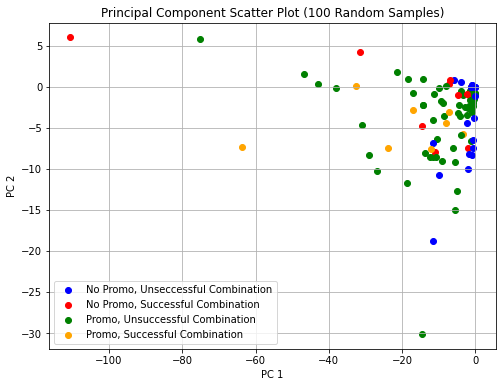

In [28]:
colors = {
    (False, False): 'blue',   # Binary column 1 is 0, Binary column 2 is 0
    (False, True): 'red',    # Binary column 1 is 0, Binary column 2 is 1
    (True, False): 'green',  # Binary column 1 is 1, Binary column 2 is 0
    (True, True): 'orange'  # Binary column 1 is 1, Binary column 2 is 1
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for i in random_numbers:
    plt.scatter(X_full[0][i], X_full[1][i], color = colors[(received_promo[i], success[i])])

# Add legend for colors
plt.scatter([], [], color='blue', label='No Promo, Unseccessful Combination')
plt.scatter([], [], color='red', label='No Promo, Successful Combination')
plt.scatter([], [], color='green', label='Promo, Unsuccessful Combination')
plt.scatter([], [], color='orange', label='Promo, Successful Combination')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal Component Scatter Plot (100 Random Samples)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
X_full

,0,1,recieved_promo,journey_successful
0,-0.309631,-2.948307,False,False
1,-65.521900,3.071966,True,False
2,-0.122722,-1.133924,False,False
3,-1.466799,-11.398894,True,False
4,-1.084775,-0.951338,False,False
...,...,...,...,...
1735761,-0.064681,-0.162831,False,False
1735762,-0.812618,-5.048555,True,False
1735763,-0.322370,-1.710714,True,False
1735764,-2.898155,-8.972950,False,False


In [23]:
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size = 0.25, random_state = 405)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# start time
start = datetime.now()

# reduced k but using full data
k_neighbors = 50

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_model.fit(X_PCA_train, y_PCA_train)

# Predictions and evaluation for KNN
knn_predictions = knn_model.predict(X_PCA_test)
knn_accuracy = accuracy_score(y_PCA_test, knn_predictions)

# end time
end = datetime.now()

print("50-Nearest Neighbors:")
print(f"Accuracy: {knn_accuracy}")
print("Classification Report:")
print(classification_report(y_PCA_test, knn_predictions))
print("computation time:", end - start)

50-Nearest Neighbors:
Accuracy: 0.8322632978600827
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.90    353208
        True       0.63      0.24      0.35     80734

    accuracy                           0.83    433942
   macro avg       0.74      0.60      0.63    433942
weighted avg       0.81      0.83      0.80    433942

computation time: 0:01:34.674936


In [30]:
from sklearn.cluster import KMeans

In [42]:
k = 4  # Change this to the desired number of clusters

# Initialize the KMeans object
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your data
kmeans.fit(X_PCA)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:")
print(cluster_labels)

Cluster labels:
[0 1 0 ... 0 0 0]


In [43]:
pd.Series(cluster_labels).value_counts()

0    1406642
2     275940
1      48966
3       4218
dtype: int64

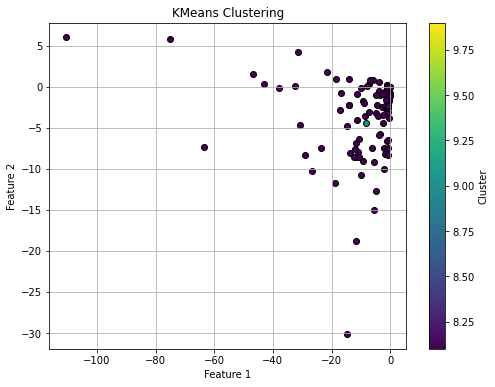

In [41]:
plt.figure(figsize=(8, 6))
for i in random_numbers:
    plt.scatter(X_PCA[0][i], X_PCA[1][i], c=cluster_labels[i], cmap='viridis', marker='o', edgecolors='k')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

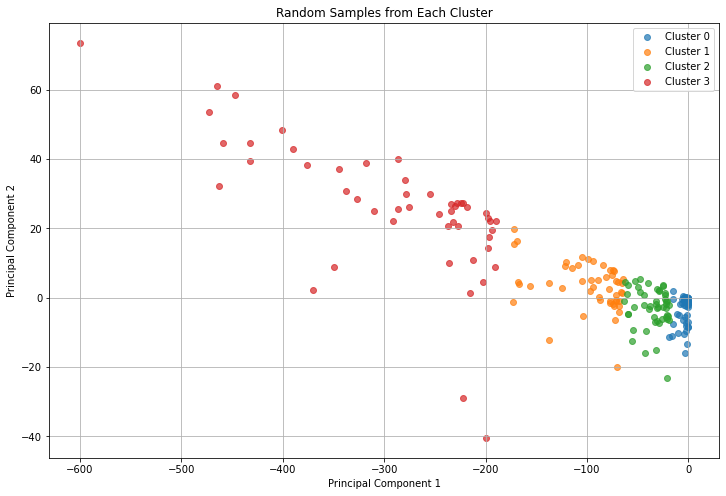

In [55]:
n = 50

# Initialize a figure to display the samples
plt.figure(figsize=(12, 8))

# Iterate over each cluster
for cluster in range(k):
    # Select indices of data points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Randomly sample 'num_samples_per_cluster' indices from the current cluster
    random_samples_indices = np.random.choice(cluster_indices, n, replace=False)
    
    # Plot the random samples from the current cluster
    plt.scatter(X_PCA[0][random_samples_indices], X_PCA[1][random_samples_indices], label=f'Cluster {cluster}', alpha=0.7)

# Add labels and legend
plt.title('Random Samples from Each Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
X_PCA[0][[2,1,2]]

2    -0.122722
1   -65.521900
2    -0.122722
Name: 0, dtype: float64